### A1: Research Question

For this project, I am going to be exploring the question `"Which factors most significantly contribute to a customer self identifying as Techie?"` Whether or not the customer considers themselves to be techically inclined was one of the questions on the questionnaire when they signed up for services. Understanding the relationship between a customer's technical inclinations and the additional services they subscribe to could be used to research ways to make more money. 

### A2: Goals

By examing the relationship between customers' technical inclinations and additional service subscriptions, we can determine if more technical customers tend to subscribe to more technical services. Discovering the tendencies of customers based on their technical inclinations can help us decide our future efforts. If more technical inclination influences the customer to subscribe to more additional services, training services could be offered to customers to help them understand technology more comfortably. Research could be done to find more services technically inclined customers want. For customers who are less technically inclined and unwilling to undergo training, more services could be provided to help fill in those gaps, like monitoring services. 

### B1: Summary of Assumptions 

Logisitic regression is a model used when the response variable has two possible outcomes. In order to make a model, the following assumptions are made.  

* The response variable can only have two possible outcomes.

* The observations are independent of each other.

* There are no extreme outliers.

* There is no multicollinearity among explanatory variables. 
Multicollinearity occurs when explanatory variables are highly correlated to each other. Because they are highly correlated they do not provide unique information in the regression model. 

### B2: Tool Benefits
For this project, I am using Python. Python is excellent for data analysis and several packages have been built specifically for this purpose. I am choosing to use Python for all of my products because I don't know any programming languages, so I'm starting at the beginning. After doing some job searches online, I found Python to be a desired skill. It has also been fun to learn, and easy to understand. For this analysis, I will be using the following packages:

Pandas - this library was created to help work with databases similar to a spreadsheet or list.
NumPy - this library is used for scientific computing and array operations.
Seaborn and MatPlotLib are both used for visualizations of data.
SciPy - statsmodels is a part of SciPy and this is what is used for the multiple regression model and for checking multicollinearity
Sklearn - this library is being used to scale the data to improve model performance

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\Crystal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### B3: Appropriate Technique

Logistic regression is used to model the relationship between a categorical variable and other independent variables that could be either continuous or categorical. It can be used to determine the probability of a binary event occurring based on a dataset. For my specific research question I'm interested in looking at which factors had a relationship with the customers' tendency to identify themselves as technically inclined. 

I am using logistic regression to explore this question. The variable of Techie is categorical and I'll be examining the relationship between a categorical variable and multiple independent variables that are either continuous or categorical. 

### C1: Data Cleaning
For this particular research question, I used the churn dataset provided by WGU. In order to use this dataset, I needed to clean it up a little using some of the same types of fixes I used in d206. After importing the dataset, I looked for missing values within the dataset, and found some within the Internet Service column. After investigating further, I found that the values were not actually missing. Within this column, there were three available answers: DSL, Fiber Optic, and None. The None value was showing up as a null when I ran my check, so I converted it to a string that said "None" instead so it would not show up as missing any longer. 
After fixing the missing values, I checked for outliers within the independent variables I had selected for my analysis. Once I had completed cleaning the data, I started prepping for multiple regression analysis. Because multiple regression analysis requires the use of numerical values rather than strings, I converted the data to numbers. For any True/False values I changed them to 1/0. For categorical variables it depends on whether or not they are ordinal. If they are ordinal, the values can be converted to numbers that correspond to their order. For variables that are nominal without an order, I generated dummy columns that represent that data in binary numeric form using a process called one hot encoding. 

In [2]:
#C1. Data Cleaning


#Import dataframe and prep for data analysis
#import churn_clean pdf as df
import pandas as pd
df = pd.read_csv(r"C:\Users\Crystal\OneDrive\Desktop\d208\churn_clean.csv")

#Look for nulls in dataset
nan_rows = df.isna().any()
print(nan_rows)
df.info()

#Check value counts for InternetService column which shows missing values
df['InternetService'].value_counts()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService          True
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [3]:
#Convert NA from InternetService column to string 'None'
df = df.fillna('None')

In [4]:
#Verify the missing values are gone
df.info()
df['InternetService'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

<Axes: >

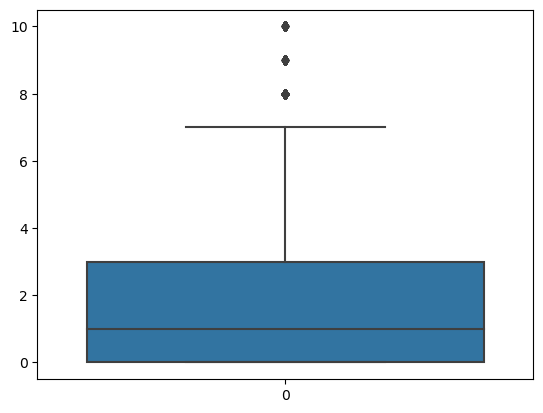

In [5]:
#Detect ouliers in Children
sns.boxplot(df['Children'])

<Axes: >

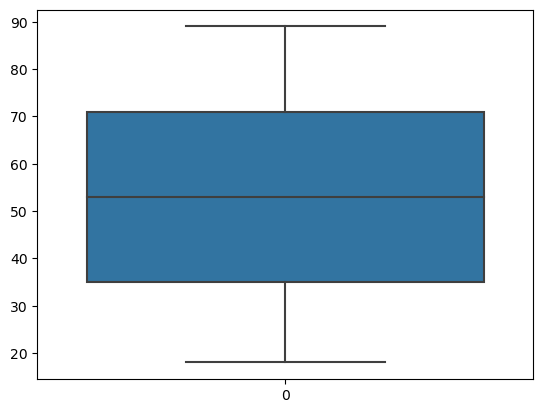

In [6]:
#Detect outliers in Age
sns.boxplot(df['Age'])

<Axes: >

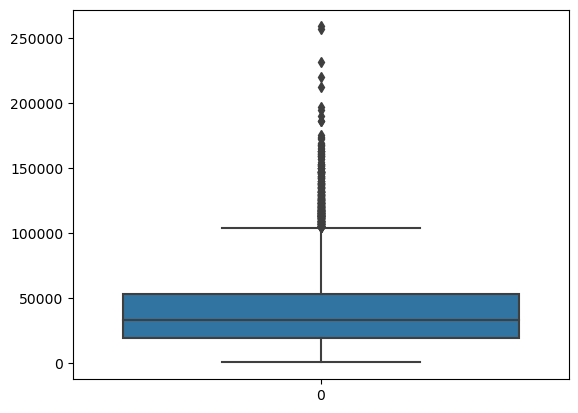

In [7]:
#Detect outliers in Income
sns.boxplot(df['Income'])

<Axes: >

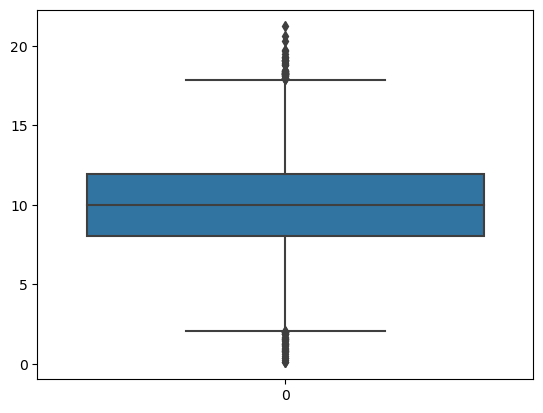

In [8]:
#Detect outliers in Outage_sec_perweek
sns.boxplot(df['Outage_sec_perweek'])

<Axes: >

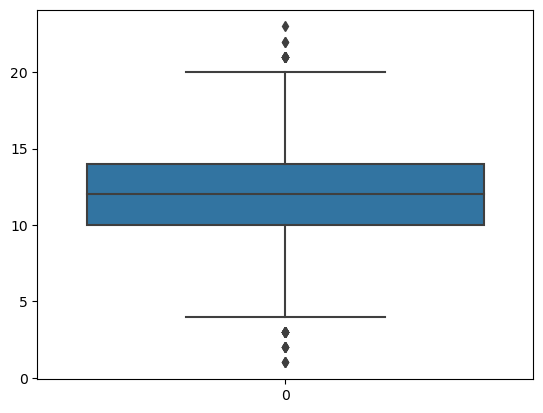

In [9]:
#Detect outliers in Email
sns.boxplot(df['Email'])

<Axes: >

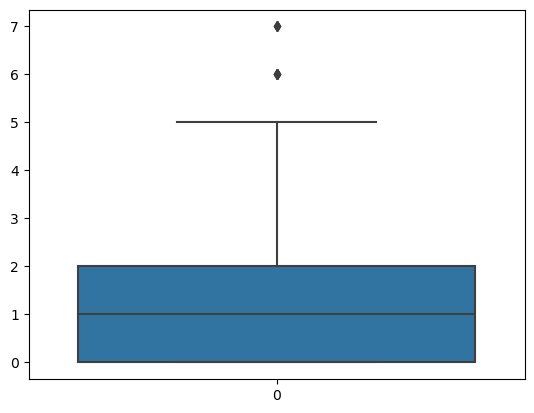

In [10]:
#Detect outliers in Contacts
sns.boxplot(df['Contacts'])

<Axes: >

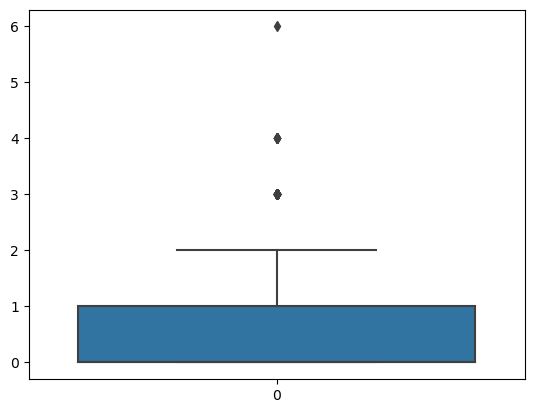

In [11]:
#Detect outliers in Yearly_equip_failure
sns.boxplot(df['Yearly_equip_failure'])

<Axes: >

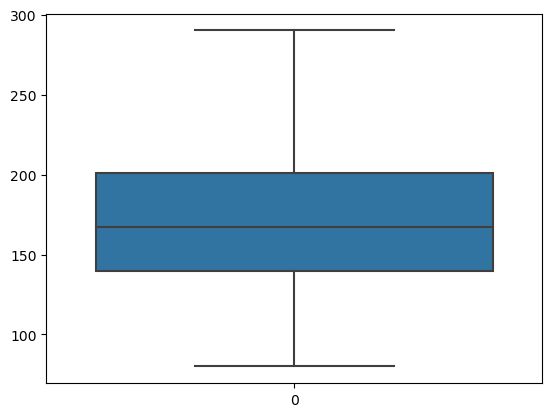

In [12]:
#Detect outliers in MonthlyCharge
sns.boxplot(df['MonthlyCharge'])

<Axes: >

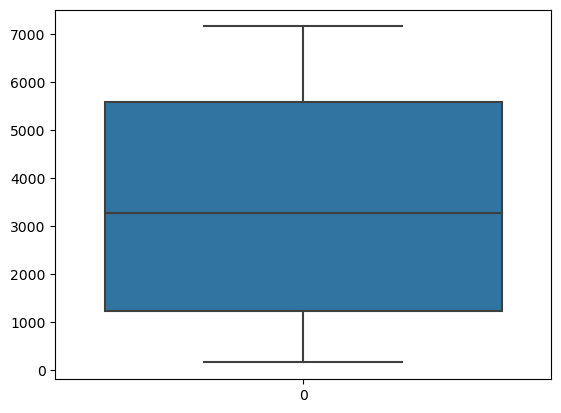

In [13]:
#Detect outliers in Bandwidth_GB_Year
sns.boxplot(df['Bandwidth_GB_Year'])

Outliers are extreme values at either end of a dataset. After looking at the boxplots for the numerical variables within this dataset, I have found that they are all reasonable, and representative of actual data within the dataset. I have elected not to remove any of the entries.

### C2: Summary Statistics
For this analysis, I am using the tenure variable as the dependent (y) and the following variables as my explanatory variables (x):

* Children - This is the number of children in the customer's household
* Age - This is the age of the customer as reported in sign-up information
* Income - Annual income of invoiced customer as reported at time of sign-up
* Marital - Marital status of customer as reported in sign-up information
* Gender - Customer self-identification as male, female, or nonbinary
* Outage_sec_perweek - Average number of seconds per week of outages reported in customer's neighborhood
* Email - Number of emails sent to customer within last year
* Contacts - Number of times customer contacted tech support
* Yearly_equip_failure - Number of times customer's equipment failed in past year
* Techie - Whether customer considers themselves technically inclined as reported at time of sign-up
* Contract - Contract term of service
* Port_modem - Whether customer has portable modem
* Tablet - Whether customer has a tablet
* InternetService - Customer's internet service provider
* Phone - Whether customer has phone service
* Multiple - Whether customer has multiple phone lines
* OnlineSecurity - Whether customer has online security add-on
* OnlineBackup - Whether customer has online backup add-on
* DeviceProtection - Whether customer has device protection add-on
* TechSupport - Whether customer has a tech support add-on
* StreamingTV - Whether customer has streaming TV
* StreamingMovies - Whether customer has streaming movies
* PaperlessBilling - Whether customers has paperless billing
* PaymentMethod - Customer's payment method
* MonthlyCharge - Average amount charged to customer monthly
* Bandwidth_GB_Year - Average amount of data used in GB per year by customer

#### Children
* For this variable, the mean doesn't really provide any useful information. Knowing the average number of children for the customers overall doesn't provide any real insights, so I included a value count as well.

In [14]:
df['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [15]:
df['Children'].value_counts().sort_index()

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: count, dtype: int64

#### Age
* Age is an interesting variable when it comes to this research question. While it is something that shouldn't be ignored in the research, it won't be able to tell us much on its own. While age may play a part in how likely a person is to consider themselves technically inclined or not, there are so many other factors at play. For example, a 53 year old single man has different telecommunication needs than a 53 year old father with children would have. I have included it in the analysis, but in the real world I would expect the age would be more helpful when paired with marital or household information.

In [16]:
df['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Income
* This category has a wide variance of entries, so I looked into the 20 smallest and 20 highest figures and found that there were multiple figures in each range. Because there were multipe low figures, and multiple high figures, I didn't feel that they should be considered excluded from the data.

In [17]:
df.Income.nsmallest(n=20)

4502     348.67
272      368.50
2051     630.24
6732     643.20
6190     644.32
1896     740.66
2525     901.21
4169     938.81
5461     945.47
4733     951.96
5714     954.43
9313    1050.46
4627    1055.12
3649    1062.32
3534    1109.71
4419    1143.18
2183    1179.53
1418    1193.19
4387    1193.66
4902    1263.57
Name: Income, dtype: float64

#### Marital
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [18]:
df['Marital'].value_counts()

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

#### Gender
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [19]:
df['Gender'].value_counts()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

#### Outages in seconds per week

In [20]:
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

#### Email

In [21]:
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

#### Contacts

In [22]:
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

#### Yearly Equipment Failure

In [23]:
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

#### Techie
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [24]:
df['Techie'].value_counts()

Techie
No     8321
Yes    1679
Name: count, dtype: int64

#### Contract
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [25]:
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

#### Port_modem
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [26]:
df['Port_modem'].value_counts()

Port_modem
No     5166
Yes    4834
Name: count, dtype: int64

#### Tablet
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [27]:
df['Tablet'].value_counts()

Tablet
No     7009
Yes    2991
Name: count, dtype: int64

#### InternetService
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [28]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

#### Phone
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [29]:
df['Phone'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Yes
1       Yes
2       Yes
3       Yes
4        No
       ... 
9995    Yes
9996    Yes
9997    Yes
9998     No
9999    Yes
Name: Phone, Length: 10000, dtype: object>

#### Multiple
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [30]:
df['Multiple'].value_counts()

Multiple
No     5392
Yes    4608
Name: count, dtype: int64

#### Online Security
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [31]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

#### Online Backup
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [32]:
df['OnlineBackup'].value_counts()

OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64

#### Device Protection
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [33]:
df['DeviceProtection'].value_counts()

DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64

#### Tech Support
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [34]:
df['TechSupport'].value_counts()

TechSupport
No     6250
Yes    3750
Name: count, dtype: int64

#### Streaming TV
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [35]:
df['StreamingTV'].value_counts()

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

#### Streaming Movies
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [36]:
df['StreamingMovies'].value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

#### Paperless Billing
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [37]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

#### Payment Method
* Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [38]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

### Monthly Charge

In [39]:
df['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

### Bandwidth GB Per Year

In [40]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

### C3: Visualizations
For the visualizations, I am beginning with the target variable of Techie. This variable is categorical, and is representative of whether the customer self identifies as being technically inclined or not. 

(-1.0999998530153243,
 1.100000007391379,
 -1.0999998667518531,
 1.0999999936548501)

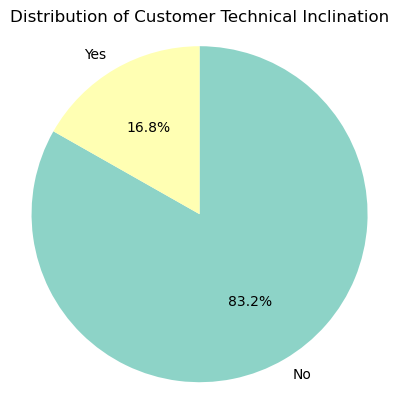

In [41]:
plt.title('Distribution of Customer Technical Inclination')
techie_counts = df['Techie'].value_counts()
plt.pie(techie_counts, labels=techie_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'),
        counterclock=False)
plt.axis('square')

For the independent variables, I will be presenting a univariate visualization as well as a bivariate visualization comparing them to the techie variable. 

Text(0, 0.5, 'Techie')

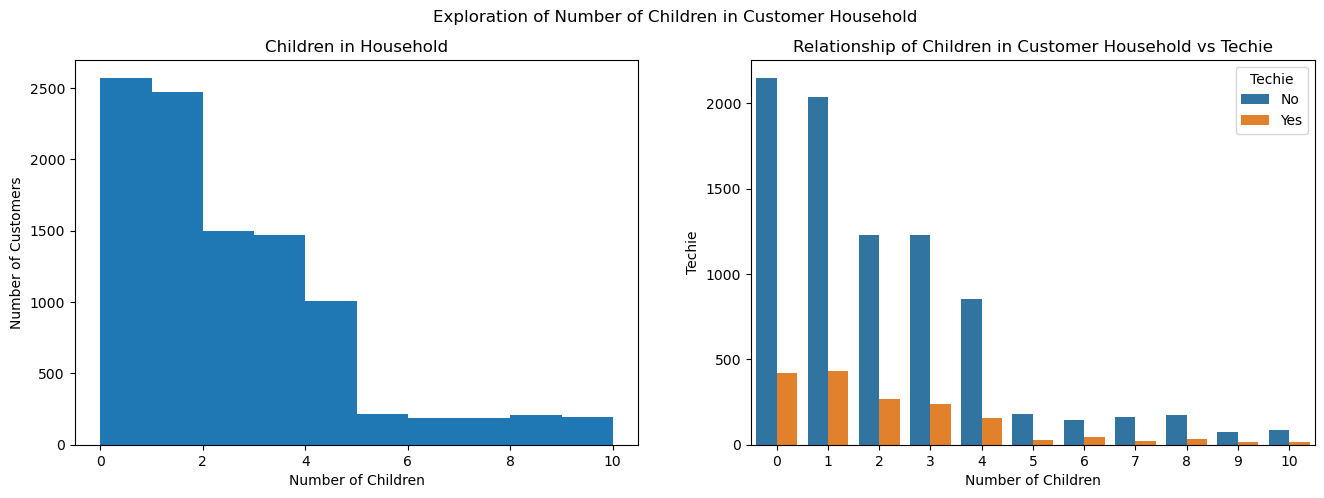

In [42]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Number of Children in Customer Household')

#LEFT PLOT: Univariate exploration of Children
plt.subplot(1,2,1)
plt.title('Children in Household')
bins = np.arange(0, df.Children.max() +1,1)
plt.hist(data=df, x='Children', bins=bins)
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Children vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Children in Customer Household vs Techie')
sns.countplot(data=df, x='Children', hue='Techie')
plt.xlabel('Number of Children')
plt.ylabel('Techie')

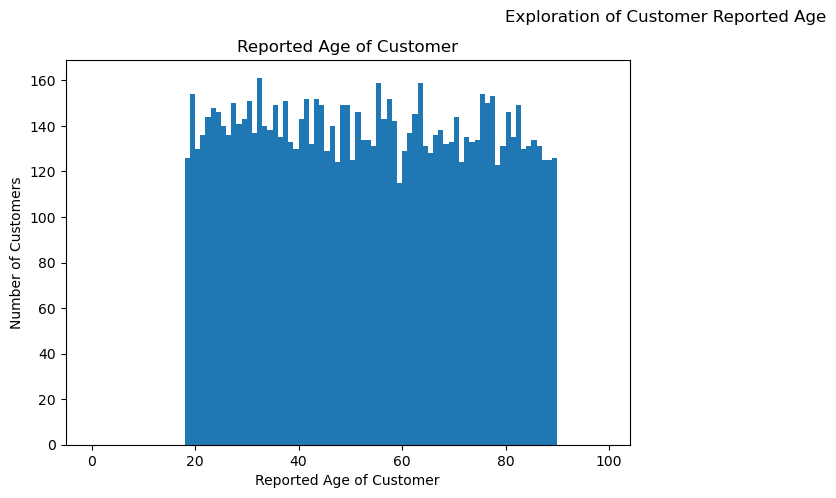

In [43]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Reported Age')

#Univariate exploration of Age
plt.subplot(1,2,1)
plt.title('Reported Age of Customer')
bins = np.arange(0, 100,1)
plt.hist(data=df, x='Age', bins=bins)
plt.xlabel('Reported Age of Customer')
plt.ylabel('Number of Customers');

Text(0, 0.5, 'Techie')

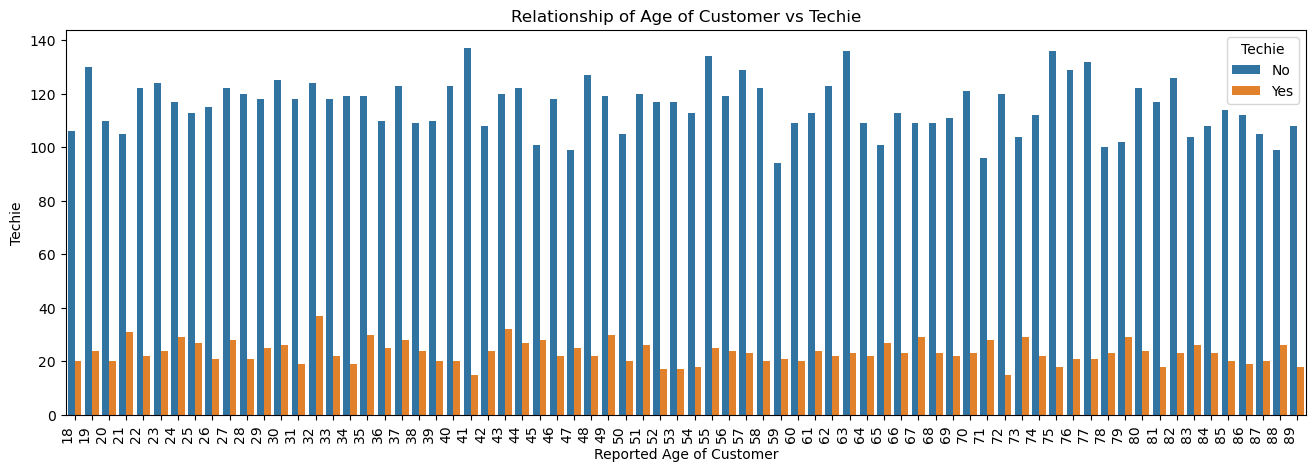

In [44]:
plt.figure(figsize = [16,5])
#Bivariate exploration of Age vs Techie
plt.title('Relationship of Age of Customer vs Techie')
my_plot=sns.countplot(data=df, x='Age', hue='Techie')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90, ha='right')
plt.xlabel('Reported Age of Customer')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

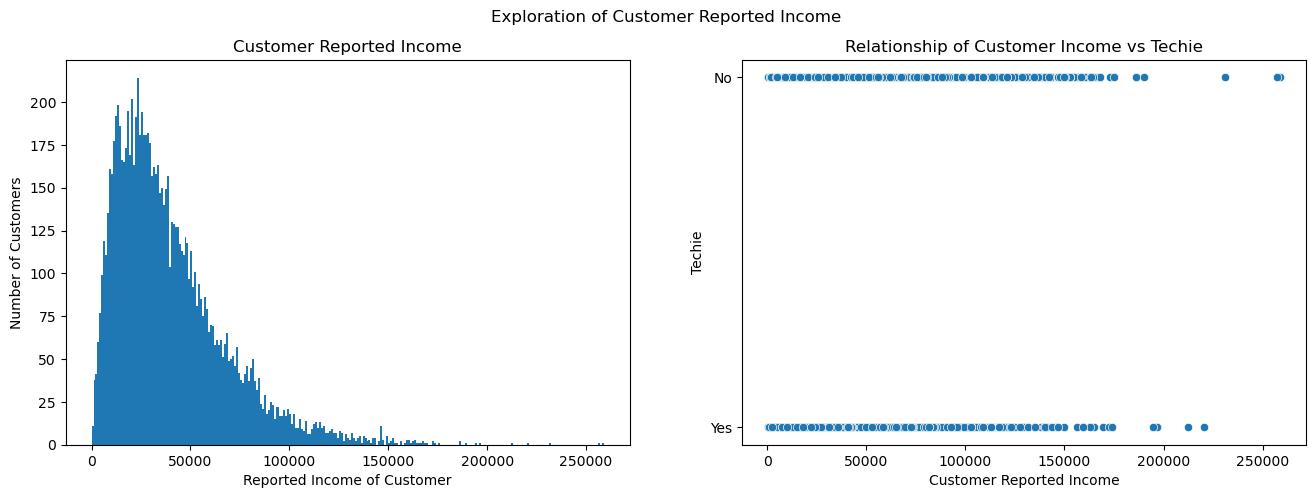

In [45]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Reported Income')

#LEFT PLOT: Univariate exploration of Income
plt.subplot(1,2,1)
plt.title('Customer Reported Income')
bins = np.arange(0, df.Income.max() +1000,1000)
plt.hist(data=df, x='Income', bins=bins)
plt.xlabel('Reported Income of Customer')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Income vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Income vs Techie')
sns.scatterplot(data=df, x='Income', y='Techie')
plt.xlabel('Customer Reported Income')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

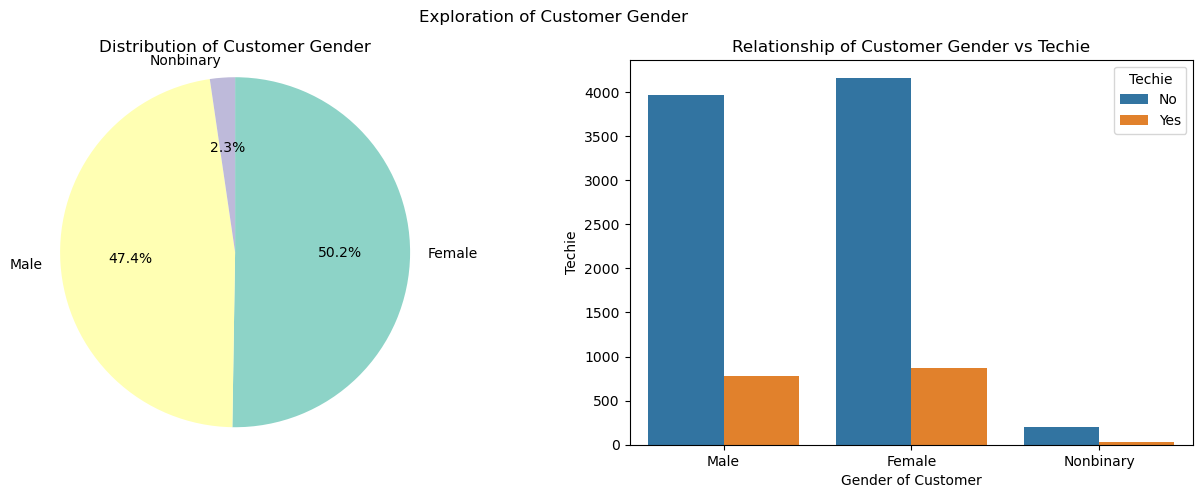

In [46]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Gender')

#LEFT PLOT: Univariate exploration of Gender
plt.subplot(1,2,1)
plt.title('Distribution of Customer Gender')
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'),counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Gender vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Gender vs Techie')
sns.countplot(data=df, x='Gender', hue='Techie')
plt.xlabel('Gender of Customer')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

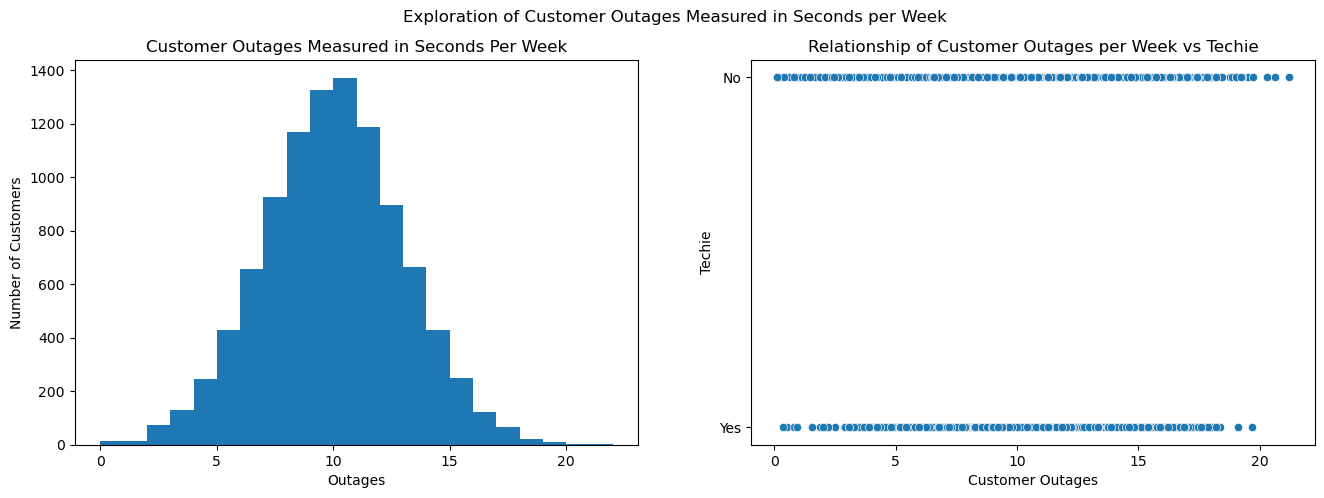

In [47]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Outages Measured in Seconds per Week')

#LEFT PLOT: Univariate exploration of Outage_sec_perweek
plt.subplot(1,2,1)
plt.title('Customer Outages Measured in Seconds Per Week')
bins=np.arange(0, df.Outage_sec_perweek.max()+1, 1)
plt.hist(data=df, x='Outage_sec_perweek', bins=bins)
plt.xlabel('Outages')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Outage_sec_perweek vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Outages per Week vs Techie')
sns.scatterplot(data=df, x='Outage_sec_perweek', y='Techie')
plt.xlabel('Customer Outages')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

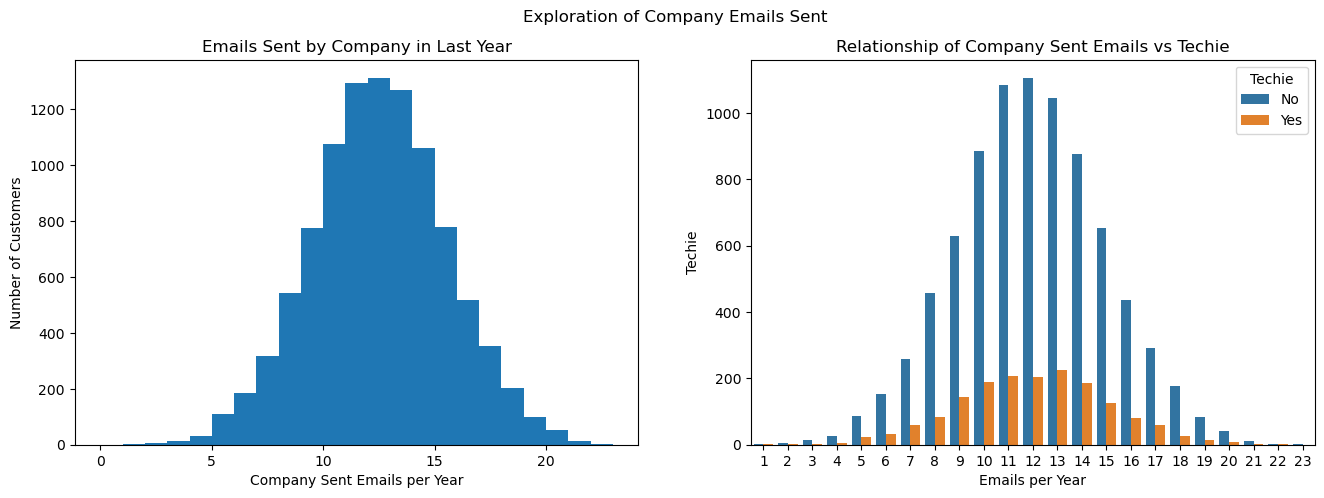

In [48]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Company Emails Sent')

#LEFT PLOT: Univariate exploration of Email
plt.subplot(1,2,1)
plt.title('Emails Sent by Company in Last Year')
bins = np.arange(0, df.Email.max() +1,1)
plt.hist(data=df, x='Email', bins=bins)
plt.xlabel('Company Sent Emails per Year')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Email vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Company Sent Emails vs Techie')
sns.countplot(data=df, x='Email', hue='Techie')
plt.xlabel('Emails per Year')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

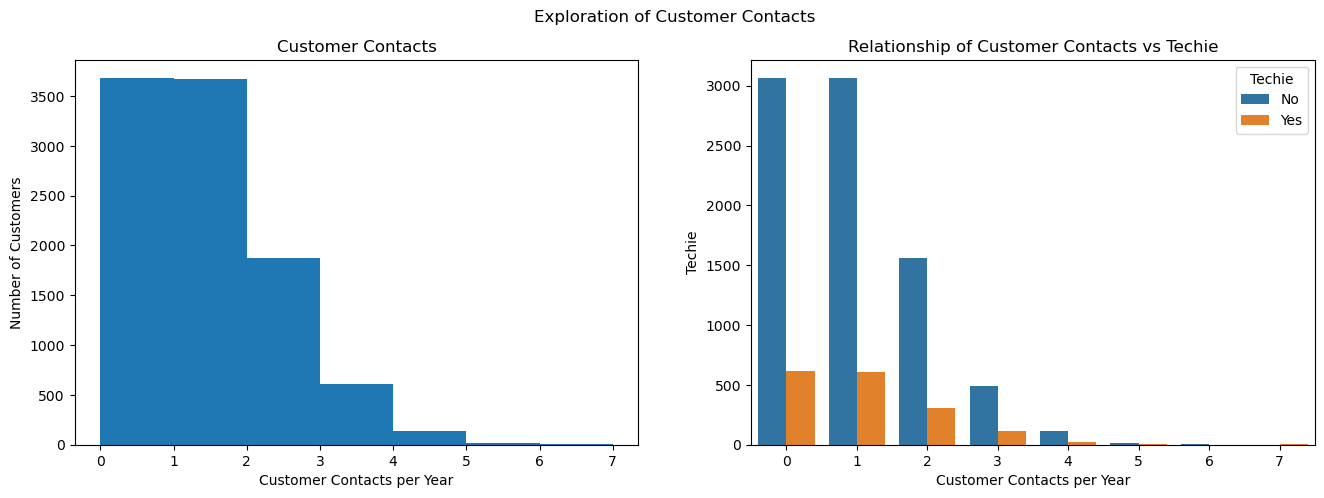

In [49]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Contacts')

#LEFT PLOT: Univariate exploration of Contacts
plt.subplot(1,2,1)
plt.title('Customer Contacts')
bins = np.arange(0, df.Contacts.max() +1,1)
plt.hist(data=df, x='Contacts', bins=bins)
plt.xlabel('Customer Contacts per Year')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Contacts vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Contacts vs Techie')
sns.countplot(data=df, x='Contacts', hue='Techie')
plt.xlabel('Customer Contacts per Year')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

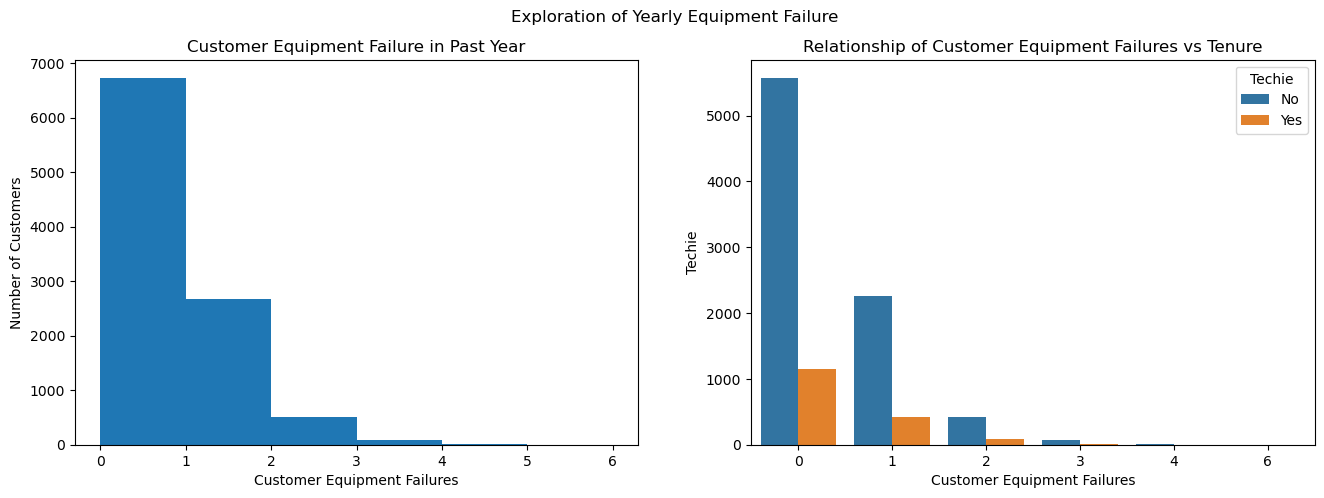

In [50]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Yearly Equipment Failure')

#LEFT PLOT: Univariate exploration of Yearly_equip_failure
plt.subplot(1,2,1)
plt.title('Customer Equipment Failure in Past Year')
bins = np.arange(0, df.Yearly_equip_failure.max() +1,1)
plt.hist(data=df, x='Yearly_equip_failure', bins=bins)
plt.xlabel('Customer Equipment Failures')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Yearly_equip_failure vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Equipment Failures vs Tenure')
sns.countplot(data=df, x='Yearly_equip_failure', hue='Techie')
plt.xlabel('Customer Equipment Failures')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

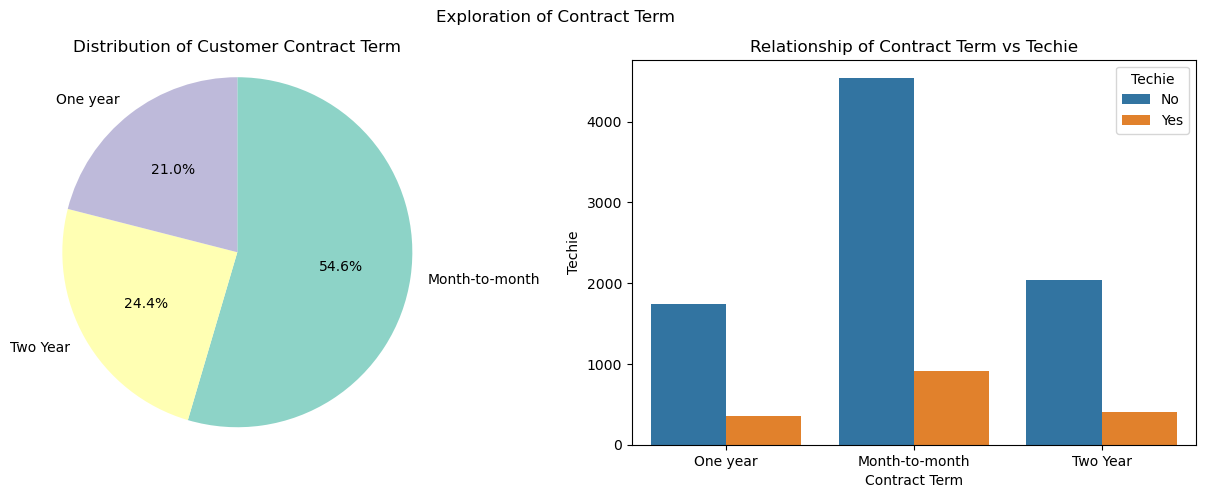

In [51]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Contract Term')

#LEFT PLOT: Univariate exploration of Contract
plt.subplot(1,2,1)
plt.title('Distribution of Customer Contract Term')
contract_counts = df['Contract'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Contract vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Contract Term vs Techie')
sns.countplot(data=df, x='Contract', hue='Techie')
plt.xlabel('Contract Term')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

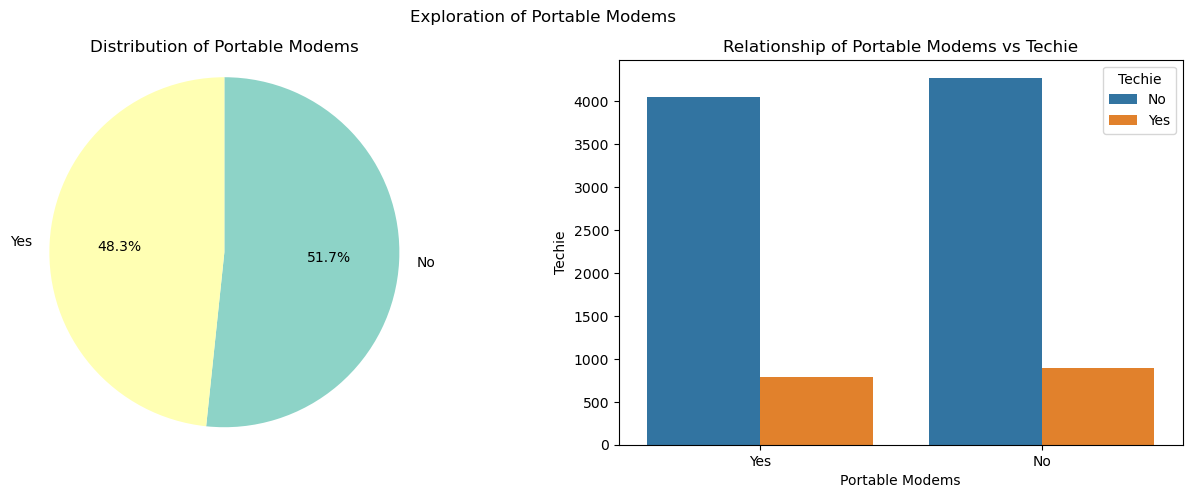

In [52]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Portable Modems')

#LEFT PLOT: Univariate exploration of Port_modem
plt.subplot(1,2,1)
plt.title('Distribution of Portable Modems')
contract_counts = df['Port_modem'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Contract vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Portable Modems vs Techie')
sns.countplot(data=df, x='Port_modem', hue='Techie')
plt.xlabel('Portable Modems')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

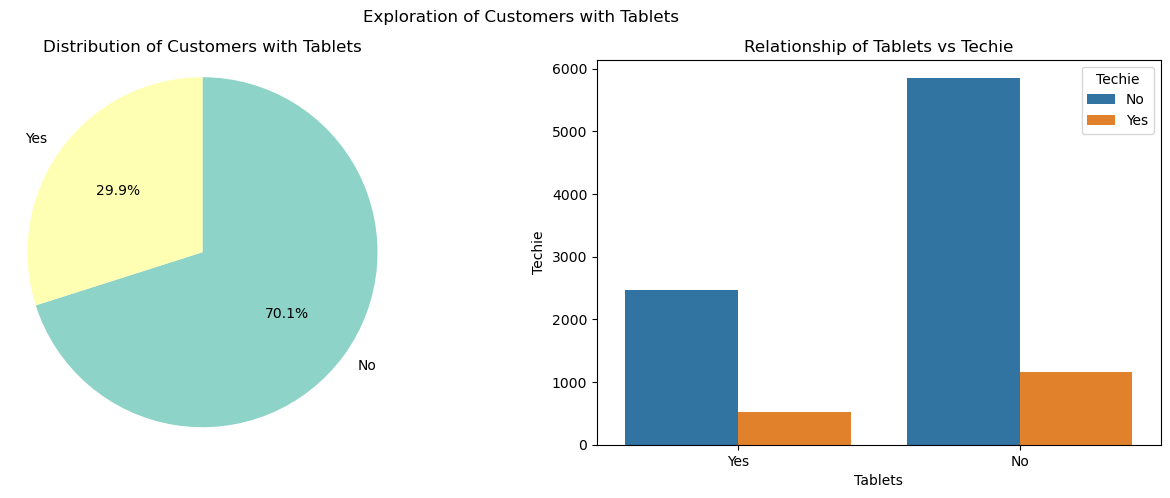

In [53]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Tablets')

#LEFT PLOT: Univariate exploration of Tablet
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Tablets')
contract_counts = df['Tablet'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Tablet vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Tablets vs Techie')
sns.countplot(data=df, x='Tablet', hue='Techie')
plt.xlabel('Tablets')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

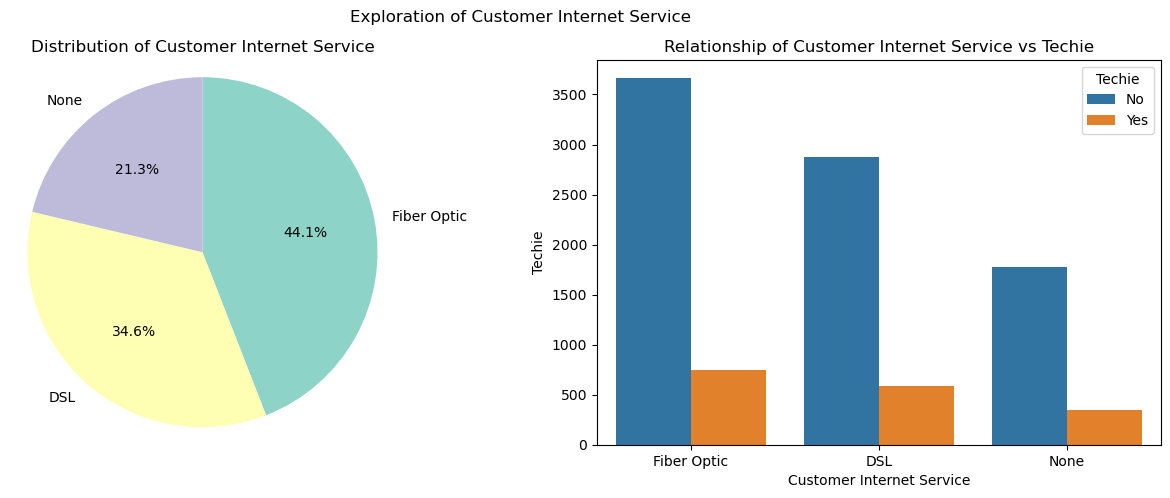

In [54]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Internet Service')

#LEFT PLOT: Univariate exploration of InternetService
plt.subplot(1,2,1)
plt.title('Distribution of Customer Internet Service')
contract_counts = df['InternetService'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of InternetService vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Internet Service vs Techie')
sns.countplot(data=df, x='InternetService', hue='Techie')
plt.xlabel('Customer Internet Service')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

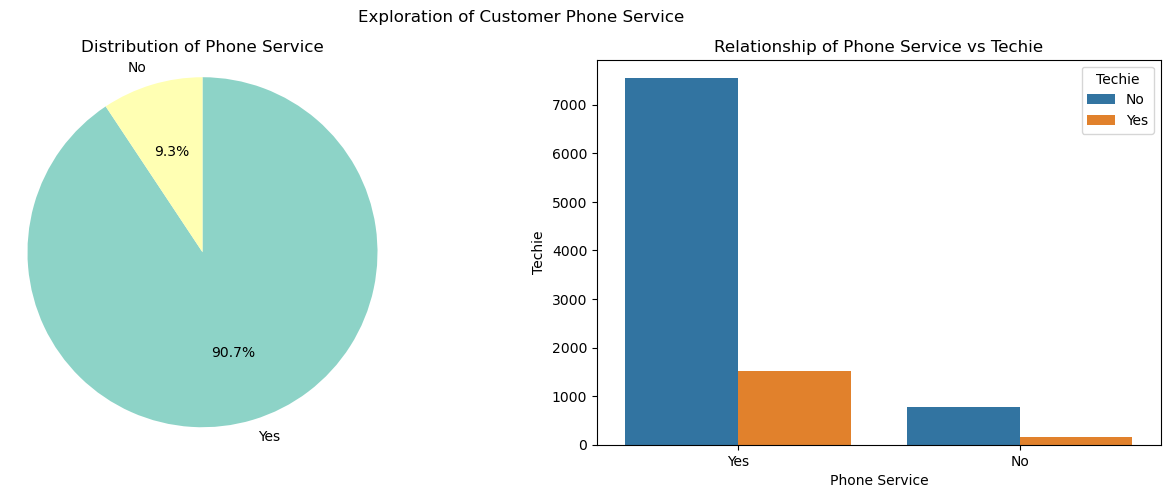

In [55]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Phone Service')

#LEFT PLOT: Univariate exploration of Phone
plt.subplot(1,2,1)
plt.title('Distribution of Phone Service')
contract_counts = df['Phone'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Phone Service vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Phone Service vs Techie')
sns.countplot(data=df, x='Phone', hue='Techie')
plt.xlabel('Phone Service')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

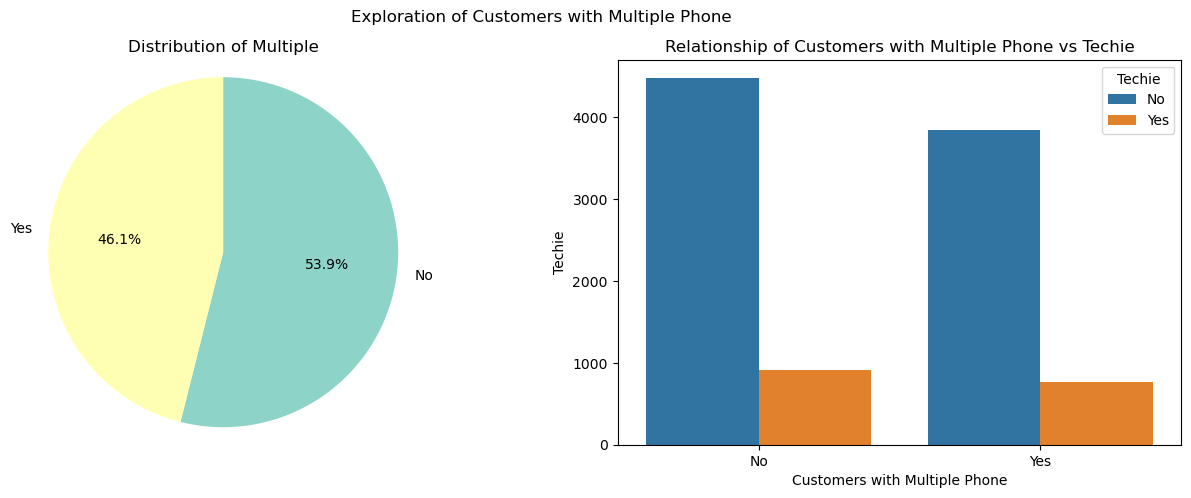

In [56]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Multiple Phone')

#LEFT PLOT: Univariate exploration of Multiple
plt.subplot(1,2,1)
plt.title('Distribution of Multiple')
contract_counts = df['Multiple'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Multiple vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Multiple Phone vs Techie')
sns.countplot(data=df, x='Multiple', hue='Techie')
plt.xlabel('Customers with Multiple Phone')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

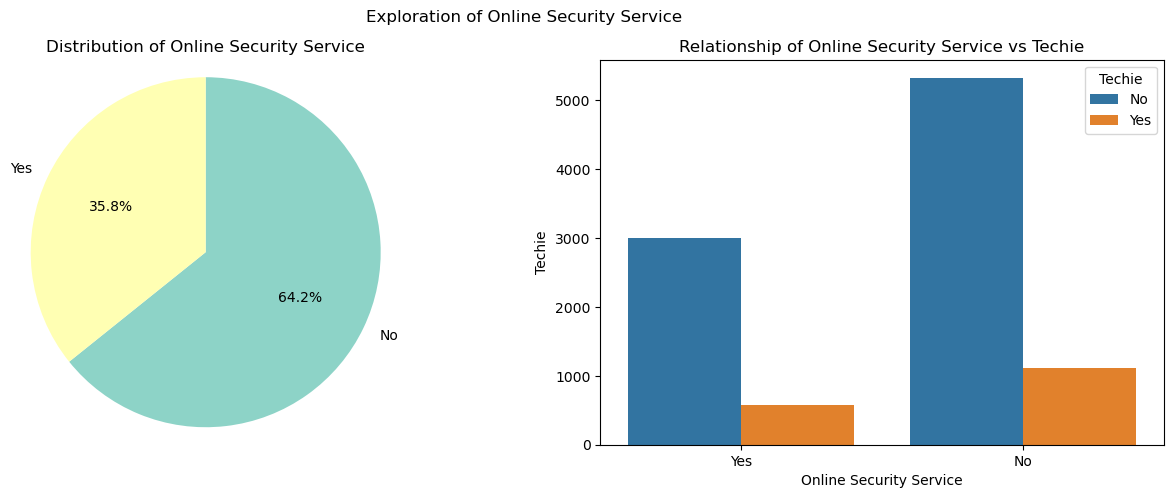

In [57]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Online Security Service')

#LEFT PLOT: Univariate exploration of OnlineSecurity
plt.subplot(1,2,1)
plt.title('Distribution of Online Security Service')
contract_counts = df['OnlineSecurity'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of OnlineSecurity vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Online Security Service vs Techie')
sns.countplot(data=df, x='OnlineSecurity', hue='Techie')
plt.xlabel('Online Security Service')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

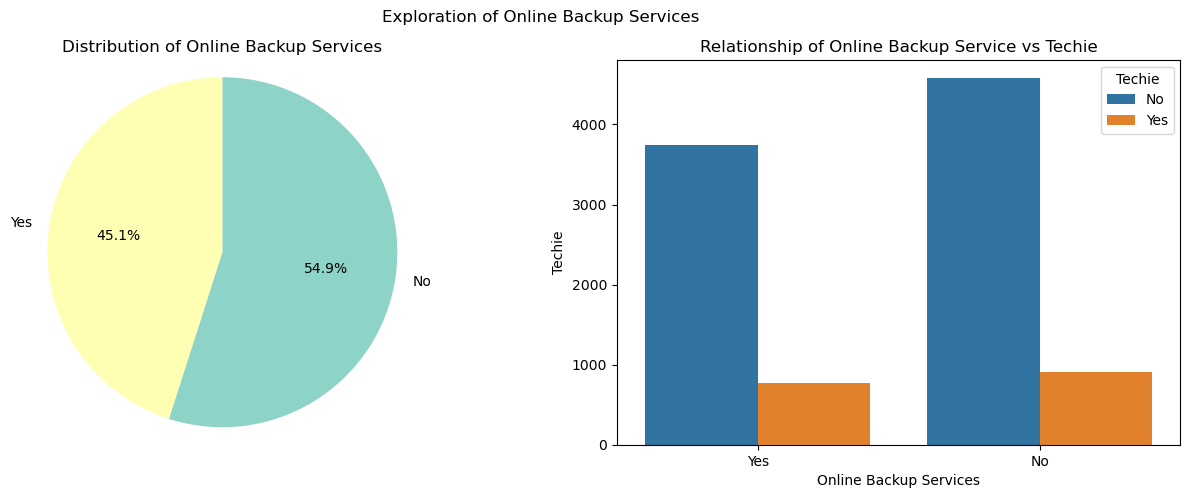

In [58]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Online Backup Services')

#LEFT PLOT: Univariate exploration of OnlineBackup
plt.subplot(1,2,1)
plt.title('Distribution of Online Backup Services')
contract_counts = df['OnlineBackup'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of OnlineBackup vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Online Backup Service vs Techie')
sns.countplot(data=df, x='OnlineBackup', hue='Techie')
plt.xlabel('Online Backup Services')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

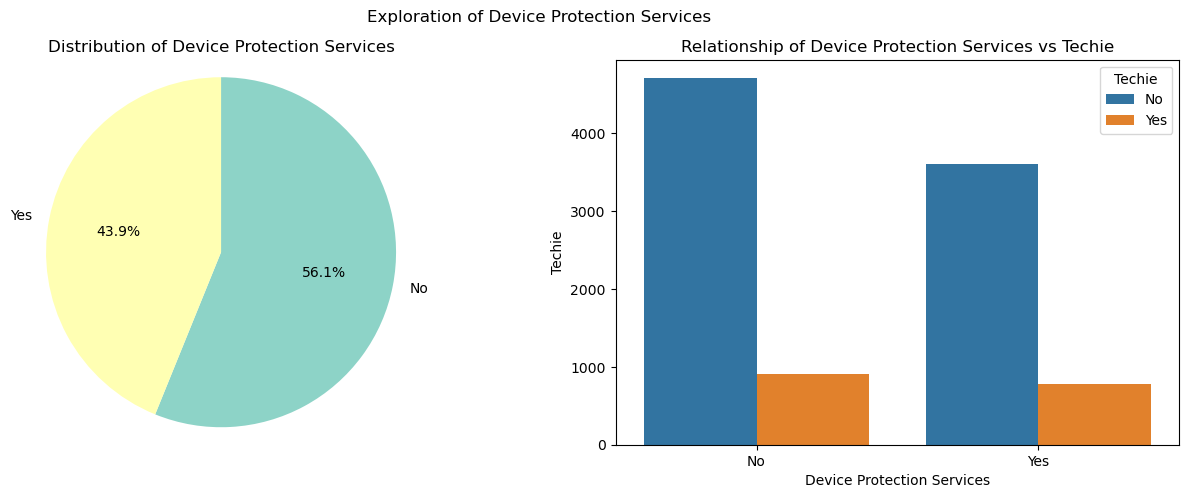

In [59]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Device Protection Services')

#LEFT PLOT: Univariate exploration of DeviceProtection
plt.subplot(1,2,1)
plt.title('Distribution of Device Protection Services')
contract_counts = df['DeviceProtection'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of DeviceProtection vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Device Protection Services vs Techie')
sns.countplot(data=df, x='DeviceProtection', hue='Techie')
plt.xlabel('Device Protection Services')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

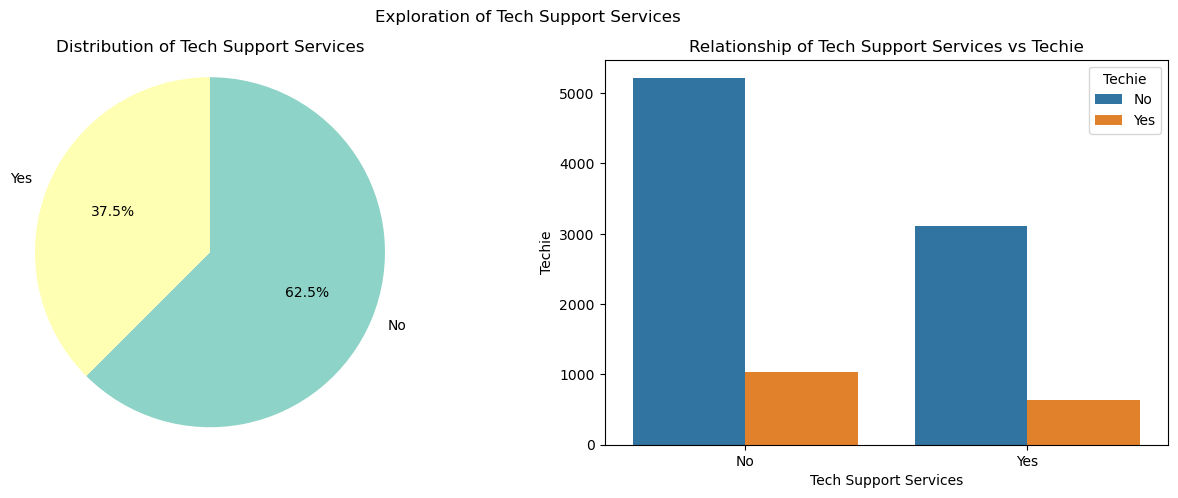

In [60]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Tech Support Services')

#LEFT PLOT: Univariate exploration of TechSupport
plt.subplot(1,2,1)
plt.title('Distribution of Tech Support Services')
contract_counts = df['TechSupport'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of TechSupport vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Tech Support Services vs Techie')
sns.countplot(data=df, x='TechSupport', hue='Techie')
plt.xlabel('Tech Support Services')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

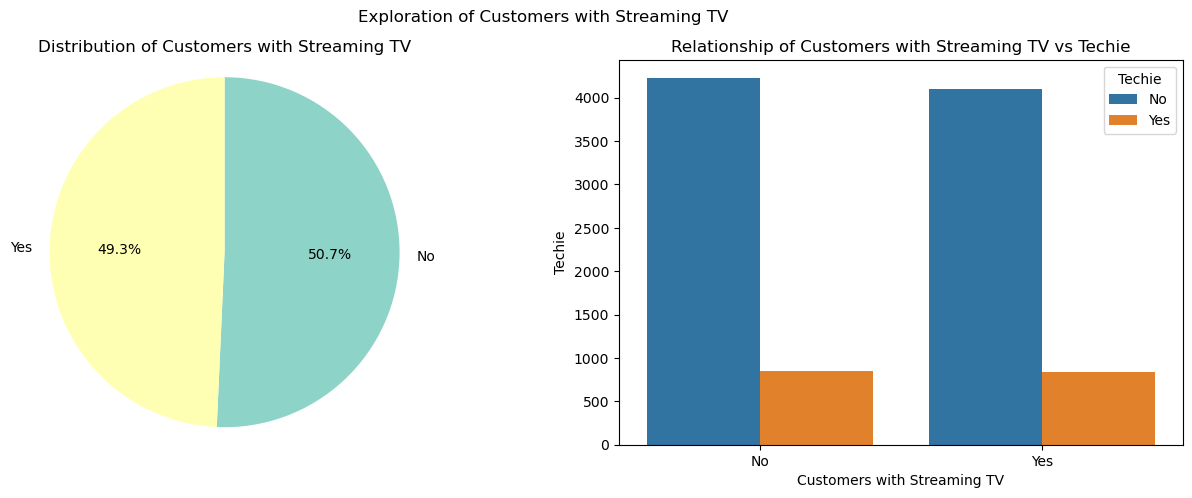

In [61]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Streaming TV')

#LEFT PLOT: Univariate exploration of StreamingTV
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Streaming TV')
contract_counts = df['StreamingTV'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of StreamingTV vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Streaming TV vs Techie')
sns.countplot(data=df, x='StreamingTV', hue='Techie')
plt.xlabel('Customers with Streaming TV')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

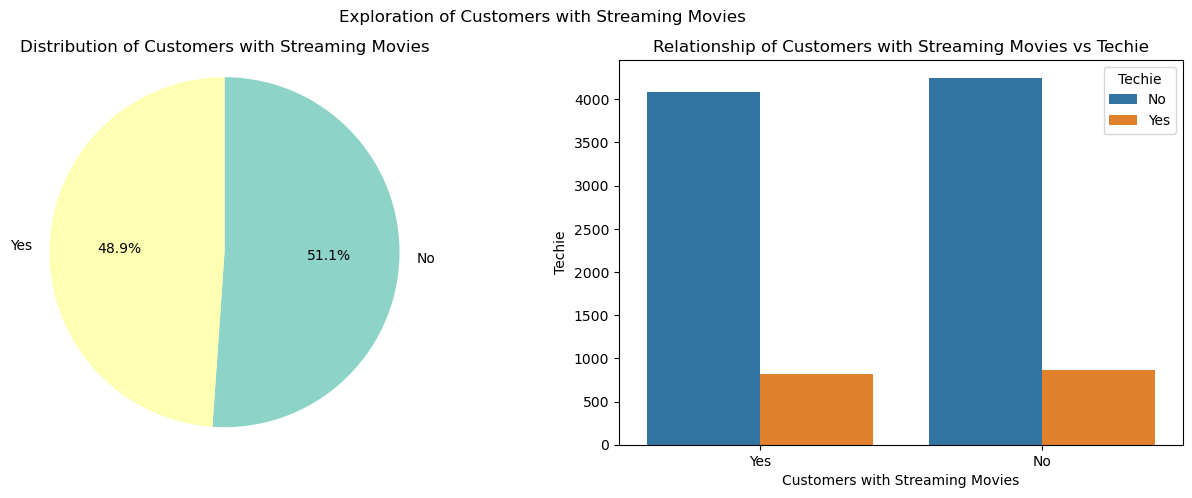

In [62]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Streaming Movies')

#LEFT PLOT: Univariate exploration of StreamingMovies
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Streaming Movies')
contract_counts = df['StreamingMovies'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of StreamingMovies vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Streaming Movies vs Techie')
sns.countplot(data=df, x='StreamingMovies', hue='Techie')
plt.xlabel('Customers with Streaming Movies')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

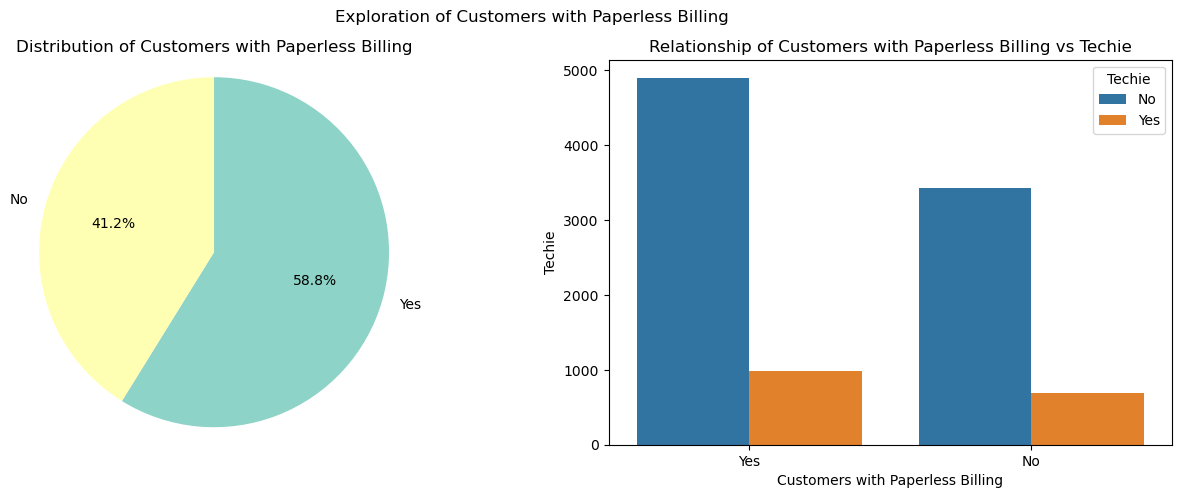

In [63]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Paperless Billing')

#LEFT PLOT: Univariate exploration of PaperlessBilling
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Paperless Billing')
contract_counts = df['PaperlessBilling'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of PaperlessBilling vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Paperless Billing vs Techie')
sns.countplot(data=df, x='PaperlessBilling', hue='Techie')
plt.xlabel('Customers with Paperless Billing')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

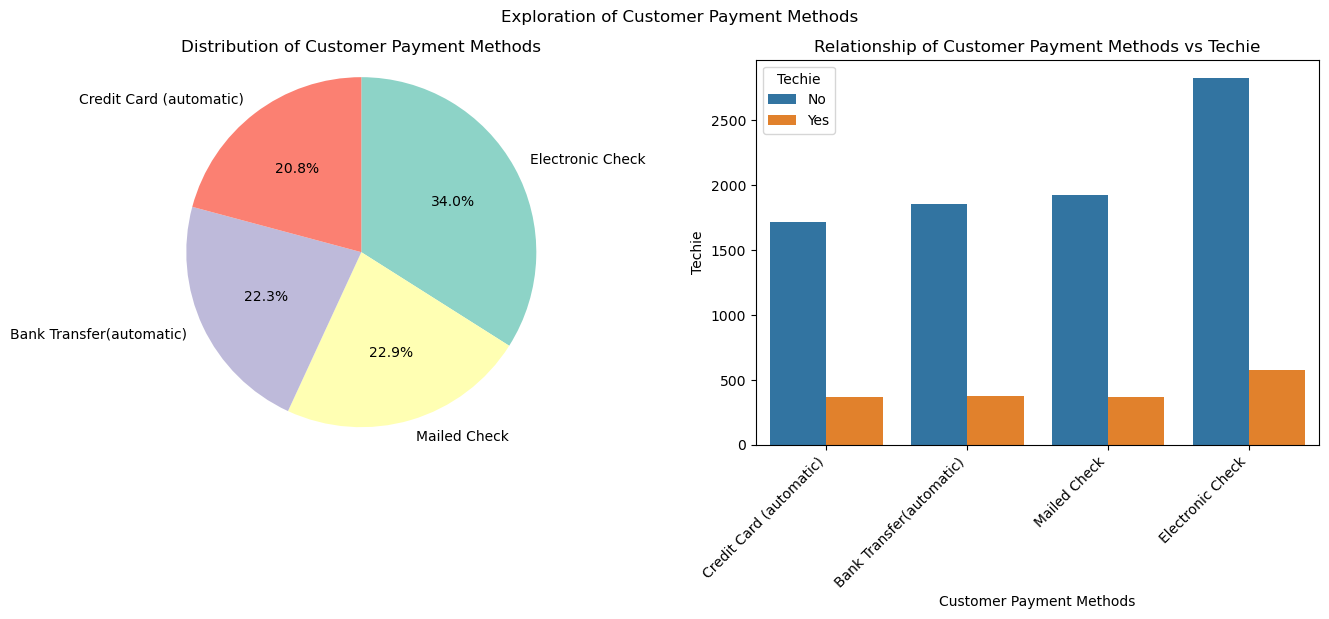

In [64]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Payment Methods')

#LEFT PLOT: Univariate exploration of PaymentMethod
plt.subplot(1,2,1)
plt.title('Distribution of Customer Payment Methods')
contract_counts = df['PaymentMethod'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of PaymentMethod vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Customer Payment Methods vs Techie')
sns.countplot(data=df, x='PaymentMethod', hue='Techie')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Customer Payment Methods')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

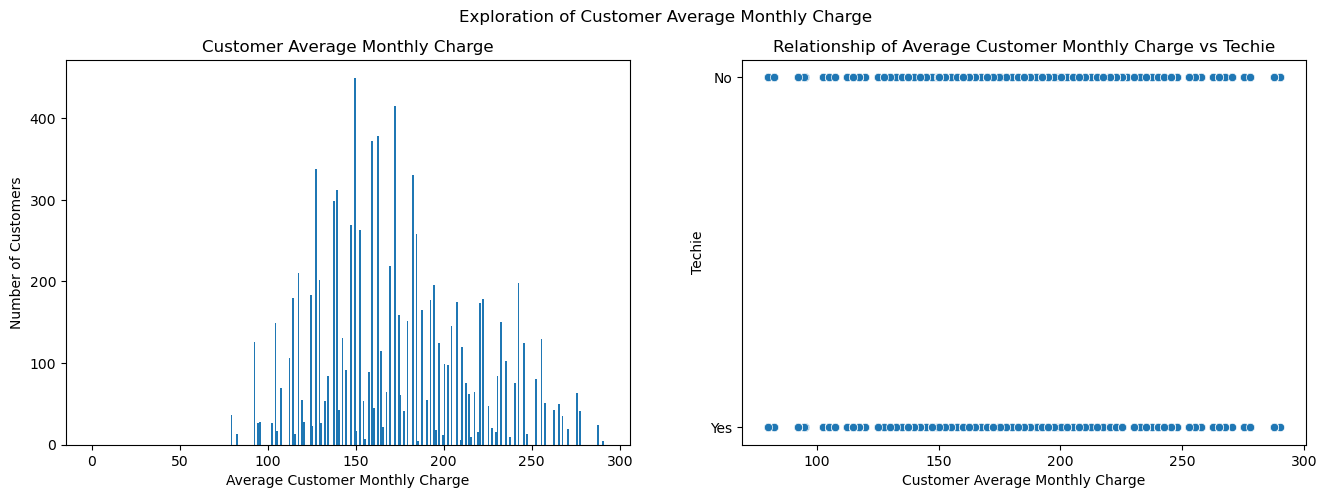

In [65]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Average Monthly Charge')

#LEFT PLOT: Univariate exploration of MonthlyCharge
plt.subplot(1,2,1)
plt.title('Customer Average Monthly Charge')
bins = np.arange(0, df.MonthlyCharge.max() +1,1)
plt.hist(data=df, x='MonthlyCharge', bins=bins)
plt.xlabel('Average Customer Monthly Charge')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of MonthlyCharge vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Average Customer Monthly Charge vs Techie')
sns.scatterplot(data=df, x='MonthlyCharge', y='Techie')
plt.xlabel('Customer Average Monthly Charge')
plt.ylabel('Techie')

Text(0, 0.5, 'Techie')

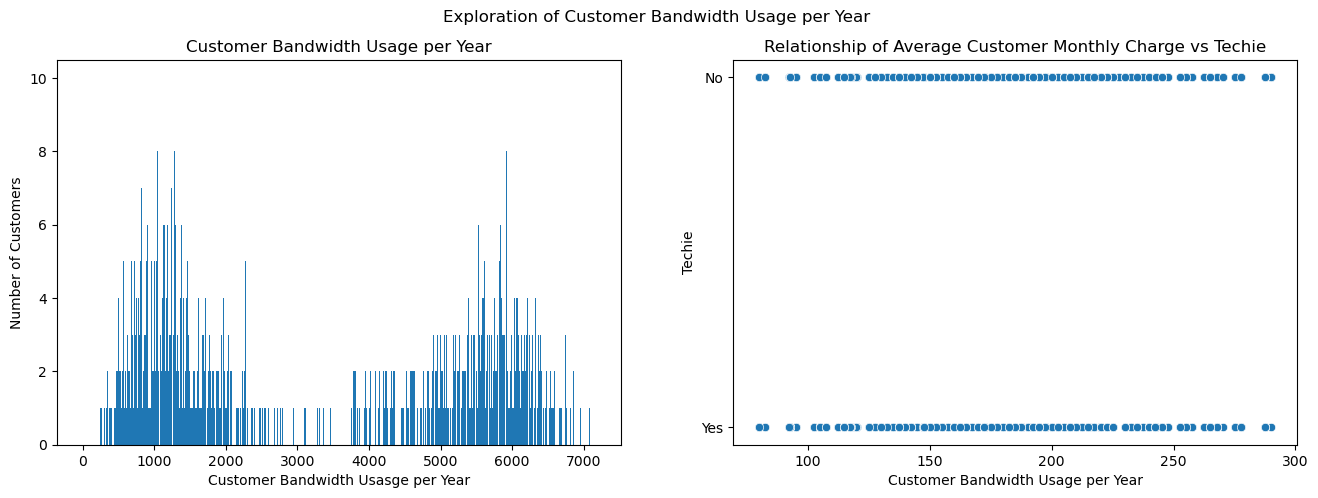

In [66]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Bandwidth Usage per Year')

#LEFT PLOT: Univariate exploration of BandWidth_GB_Year
plt.subplot(1,2,1)
plt.title('Customer Bandwidth Usage per Year')
bins = np.arange(0, df.Bandwidth_GB_Year.max() +1,1)
plt.hist(data=df, x='Bandwidth_GB_Year', bins=bins)
plt.xlabel('Customer Bandwidth Usasge per Year')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of MonthlyCharge vs Techie
plt.subplot(1,2,2)
plt.title('Relationship of Average Customer Monthly Charge vs Techie')
sns.scatterplot(data=df, x='MonthlyCharge', y='Techie')
plt.xlabel('Customer Bandwidth Usage per Year')
plt.ylabel('Techie')

### C4: Data Transformation 

Logistic Regression analysis requires numerical values. Therefore, in order to perform logistic regression analysis on this dataset, some of the data needs to be converted from categorical data to numerical. For this analysis I will transform all Yes/No answers to 1/0. For the categorical variables that are nominal, I will be using one hot encoding. This is a technique that uses dummy columns to represent the data in binary form. For example, the gender category would be split to gender-male and gender-female. If the entry is male, there would be a 1 under the gender-male column and a 0 under gender-female, the same would be true in reverse for an entry of female. If the entry for gender is nonbinary, there would be a 0 under each column gender-male and gender-female. In order to do this, I will be using the pandas get_dummies() function.

In [67]:
#Convert columns from string to category for boolean conversion
df['Churn'] = df['Churn'].astype('category')
df['Techie'] = df['Techie'].astype('category')
df['Port_modem'] = df['Port_modem'].astype('category')
df['Tablet'] = df['Tablet'].astype('category')
df['Phone'] = df['Phone'].astype('category')
df['Multiple'] = df['Multiple'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')

#Convert columns from string to category for one-hot encoding 
df['Marital'] = df['Marital'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CaseOrder             10000 non-null  int64   
 1   Customer_id           10000 non-null  object  
 2   Interaction           10000 non-null  object  
 3   UID                   10000 non-null  object  
 4   City                  10000 non-null  object  
 5   State                 10000 non-null  object  
 6   County                10000 non-null  object  
 7   Zip                   10000 non-null  int64   
 8   Lat                   10000 non-null  float64 
 9   Lng                   10000 non-null  float64 
 10  Population            10000 non-null  int64   
 11  Area                  10000 non-null  object  
 12  TimeZone              10000 non-null  object  
 13  Job                   10000 non-null  object  
 14  Children              10000 non-null  int64   
 15  Age

In [68]:
#Convert categorical data to binary using one hot encoding 
cdf=pd.get_dummies(data=df, dtype=int, drop_first=True, 
                  columns=['Gender', 'Marital', 'Contract', 'InternetService', 'PaymentMethod', 
                           'Churn', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                           'PaperlessBilling', 'Techie'])
cdf.info()

cdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CaseOrder                              10000 non-null  int64  
 1   Customer_id                            10000 non-null  object 
 2   Interaction                            10000 non-null  object 
 3   UID                                    10000 non-null  object 
 4   City                                   10000 non-null  object 
 5   State                                  10000 non-null  object 
 6   County                                 10000 non-null  object 
 7   Zip                                    10000 non-null  int64  
 8   Lat                                    10000 non-null  float64
 9   Lng                                    10000 non-null  float64
 10  Population                             10000 non-null  int64  
 11  Are

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Techie_Yes
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,1,0,1,1,0,0,0,1,1,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,1,1,1,0,0,0,1,1,1,1
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,1,1,0,0,0,0,0,1,1,1
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,1,0,1,0,0,0,1,0,1,1
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,0,0,0,0,0,1,1,0,0,0


In [69]:
#Create new df with only variables used in model
df = cdf[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Techie_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Tenure                                 10000 non-null  float64
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Gender_Male                            10000 non-null  int32  
 5   Gender_Nonbinary                       10000 non-null  int32  
 6   Marital_Never Married                  10000 non-null  int32  
 7   Marital_Separated                      10000 non-null  int32  
 8   Marital_Widowed                        10000 non-null  int32  
 9   Contract_One year                      10000 non-null  int32  
 10  Contract_Two Year                      10000 non-null  int32  
 11  Int

,Tenure,Children,Age,Income,Gender_Male,Gender_Nonbinary,Marital_Never Married,Marital_Separated,Marital_Widowed,Contract_One year,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year
0,6.795513,0,68,28561.99,1,0,0,0,1,1,...,0,0,1,1,7.978323,10,0,1,172.455519,904.536110
1,1.156681,1,27,21704.77,0,0,0,0,0,0,...,0,1,1,1,11.699080,12,0,1,242.632554,800.982766
2,15.754144,4,50,9609.57,0,0,0,0,1,0,...,0,0,1,1,10.752800,9,0,1,159.947583,2054.706961
3,17.087227,1,48,18925.23,1,0,0,0,0,0,...,0,1,0,1,14.913540,15,2,0,119.956840,2164.579412
4,1.670972,0,83,40074.19,1,0,0,1,0,0,...,1,1,0,0,8.147417,16,2,1,149.948316,271.493436


### C5: Prepared Dataset

In [70]:
#Save dataframe to CSV
df.to_csv('cmf_d208_t2_clean.csv', index=False)

### D1: Initial Model

In [71]:
#Logistic Regression Model
#Setting the values for X and y variables
y = df.Techie_Yes
X = df[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes','Port_modem_Yes', 'Tablet_Yes', 'Phone_Yes',
        'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447482
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9965
Method:                           MLE   Df Model:                           34
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01118
Time:                        14:37:05   Log-Likelihood:                -4474.8
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.363e-08
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.0122      

### D2: Justification of Model Reduction 
In order to make sure that there is not multicollinearity, I am going to use Variance Influence Factor (VIF).VIF is used to detect the severity of multicollinearity in a regression analysis. When using VIF, you should remove any variables that have a score of 10 or larger. After checking the VIF scores, I found that Bandwidth_GB_Year, MonthlyCharge, and Email all got scores over 10. I removed them from the model. 

#### Variance Influence Factor (VIF)

In [72]:
#Using VIF to see if variables should be eliminated due to multicollinearity
X = df[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
print(vif_df)

                                  feature           VIF
0                                  Tenure  18263.988931
1                                Children     14.841190
2                                     Age     50.332702
3                                  Income      2.996263
4                             Gender_Male      5.194917
5                        Gender_Nonbinary      1.055119
6                   Marital_Never Married      1.492241
7                       Marital_Separated      1.505304
8                         Marital_Widowed      1.509811
9                       Contract_One year      1.505573
10                      Contract_Two Year      1.591428
11            InternetService_Fiber Optic    167.464818
12                   InternetService_None     37.806498
13  PaymentMethod_Credit Card (automatic)      1.936511
14         PaymentMethod_Electronic Check      2.530226
15             PaymentMethod_Mailed Check      2.027584
16                              Churn_Yes      2

In [73]:
#Eliminated Bandwidth_GB_Year (VIF=23367.54) and rerunning analysis
X = df[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
print(vif_df)

                                  feature         VIF
0                                  Tenure    3.914670
1                                Children    1.940032
2                                     Age    7.312194
3                                  Income    2.963259
4                             Gender_Male    1.938706
5                        Gender_Nonbinary    1.047614
6                   Marital_Never Married    1.481812
7                       Marital_Separated    1.498812
8                         Marital_Widowed    1.500470
9                       Contract_One year    1.503355
10                      Contract_Two Year    1.589840
11            InternetService_Fiber Optic    3.688080
12                   InternetService_None    1.700485
13  PaymentMethod_Credit Card (automatic)    1.915083
14         PaymentMethod_Electronic Check    2.495100
15             PaymentMethod_Mailed Check    2.003071
16                              Churn_Yes    2.654644
17                         P

In [74]:
#Eliminated MonthlyCharge (VIF=179.16) and rerunning analysis
X = df[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
print(vif_df)

                                  feature        VIF
0                                  Tenure   3.757996
1                                Children   1.923761
2                                     Age   6.886620
3                                  Income   2.899976
4                             Gender_Male   1.928824
5                        Gender_Nonbinary   1.046995
6                   Marital_Never Married   1.470694
7                       Marital_Separated   1.489614
8                         Marital_Widowed   1.490385
9                       Contract_One year   1.482246
10                      Contract_Two Year   1.569931
11            InternetService_Fiber Optic   2.251427
12                   InternetService_None   1.607525
13  PaymentMethod_Credit Card (automatic)   1.889866
14         PaymentMethod_Electronic Check   2.448439
15             PaymentMethod_Mailed Check   1.963497
16                              Churn_Yes   2.562869
17                         Port_modem_Yes   1.

In [75]:
#Eliminating Email (VIF=12.91) and rerunning analysis
X = df[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
print(vif_df)

                                  feature       VIF
0                                  Tenure  3.718503
1                                Children  1.913887
2                                     Age  6.664900
3                                  Income  2.875421
4                             Gender_Male  1.918215
5                        Gender_Nonbinary  1.046693
6                   Marital_Never Married  1.463588
7                       Marital_Separated  1.483926
8                         Marital_Widowed  1.484464
9                       Contract_One year  1.478190
10                      Contract_Two Year  1.563924
11            InternetService_Fiber Optic  2.230564
12                   InternetService_None  1.598443
13  PaymentMethod_Credit Card (automatic)  1.867440
14         PaymentMethod_Electronic Check  2.420620
15             PaymentMethod_Mailed Check  1.938466
16                              Churn_Yes  2.547317
17                         Port_modem_Yes  1.909020
18          

In [76]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_minmax = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Print the scaled DataFrame
print(df_minmax)

        Tenure  Children       Age    Income  Gender_Male  Gender_Nonbinary  \
0     0.081624       0.0  0.704225  0.109120          1.0               0.0   
1     0.002203       0.1  0.126761  0.082599          0.0               0.0   
2     0.207804       0.4  0.450704  0.035818          0.0               0.0   
3     0.226580       0.1  0.422535  0.071848          1.0               0.0   
4     0.009447       0.0  0.915493  0.153646          1.0               0.0   
...        ...       ...       ...       ...          ...               ...   
9995  0.946448       0.3  0.070423  0.214174          1.0               0.0   
9996  0.845647       0.4  0.422535  0.130653          1.0               0.0   
9997  0.653764       0.1  0.422535  0.176501          0.0               0.0   
9998  0.987272       0.1  0.295775  0.063117          1.0               0.0   
9999  0.878190       0.1  0.140845  0.033542          1.0               0.0   

      Marital_Never Married  Marital_Separated  Mar

In [77]:
#Reduced model by eliminating Bandwidth_GB_Year, MonthlyCharge, and Email due to multicollinearity issues
#Continue reducing model by removing highest p-value (alpha=0.05)

y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447625
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9968
Method:                           MLE   Df Model:                           31
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01086
Time:                        14:37:13   Log-Likelihood:                -4476.2
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 6.318e-09
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3485      

#### Backward Elimination 
Backward elimination starts out by running a regression model using all of the variables. After running the regression, the variables are checked to see if they are statistically significant or not as determined by their p-values. Any variable with a p-value over the alpha value of 0.05 is eliminated, and the regression is run again to determine all variables are statistically significant. If not, the variable with the highest p-value is eliminated and the regression is run again. This is done one by one until every variable that is left in the model has a p-value under the alpha value of 0.05.

In [78]:
#Backward Elimination 1: Find highest p-value over 0.05
#Eliminating PaperlessBilling_Yes p-value 0.939
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447625
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9969
Method:                           MLE   Df Model:                           30
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01086
Time:                        14:37:14   Log-Likelihood:                -4476.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 3.421e-09
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3485      

In [79]:
#Backward Elimination 2: Find highest p-value over 0.05
#Eliminating Phone_Yes p-value 0.933
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447625
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9970
Method:                           MLE   Df Model:                           29
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01086
Time:                        14:37:14   Log-Likelihood:                -4476.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.822e-09
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3486      

In [80]:
#Backward Elimination 3: Find highest p-value over 0.05
#Eliminating Marital_Separated p-value 0.897
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447626
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9971
Method:                           MLE   Df Model:                           28
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01086
Time:                        14:37:14   Log-Likelihood:                -4476.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 9.570e-10
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3484      

In [81]:
#Backward Elimination 4: Find highest p-value over 0.05
#Eliminating OnlineBackup_Yes p-value 0.819
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes',
        'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447629
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9972
Method:                           MLE   Df Model:                           27
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01085
Time:                        14:37:14   Log-Likelihood:                -4476.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 5.003e-10
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3471      

In [82]:
#Backward Elimination 5: Find highest p-value over 0.05
#Eliminating PaymentMethod_Electronic Check p-value 0.790
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447632
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9973
Method:                           MLE   Df Model:                           26
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01085
Time:                        14:37:15   Log-Likelihood:                -4476.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 2.585e-10
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3465      

In [83]:
#Backward Elimination 6: Find highest p-value over 0.05
#Eliminating InternetService_None p-value 0.784
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447636
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9974
Method:                           MLE   Df Model:                           25
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01084
Time:                        14:37:15   Log-Likelihood:                -4476.4
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.312e-10
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3448      

In [84]:
#Backward Elimination 7: Find highest p-value over 0.05
#Eliminating Income p-value 0.685
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447644
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9975
Method:                           MLE   Df Model:                           24
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01082
Time:                        14:37:15   Log-Likelihood:                -4476.4
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 6.763e-11
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3451      

In [85]:
#Backward Elimination 8: Find highest p-value over 0.05
#Eliminating Contacts p-value 0.666
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447654
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9976
Method:                           MLE   Df Model:                           23
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01080
Time:                        14:37:15   Log-Likelihood:                -4476.5
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 3.446e-11
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3454      

In [86]:
#Backward Elimination 9: Find highest p-value over 0.05
#Eliminating TechSupport_Yes p-value 0.603
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes','Outage_sec_perweek',
        'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447667
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01077
Time:                        14:37:16   Log-Likelihood:                -4476.7
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.778e-11
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3461      

In [87]:
#Backward Elimination 10: Find highest p-value over 0.05
#Eliminating Outage_sec_perweek p-value 0.542
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Children', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447686
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9978
Method:                           MLE   Df Model:                           21
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01073
Time:                        14:37:16   Log-Likelihood:                -4476.9
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 9.367e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3461      

In [88]:
#Backward Elimination 11: Find highest p-value over 0.05
#Eliminating Children p-value 0.451
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes', 'Yearly_equip_failure']].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447714
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01067
Time:                        14:37:16   Log-Likelihood:                -4477.1
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 5.238e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3462      

In [89]:
#Backward Elimination 12: Find highest p-value over 0.05
#Eliminating Yearly_equip_failure p-value 0.445
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Age', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447744
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9980
Method:                           MLE   Df Model:                           19
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01060
Time:                        14:37:16   Log-Likelihood:                -4477.4
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 2.890e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3458      

In [90]:
#Backward Elimination 13: Find highest p-value over 0.05
#Eliminating Age p-value 0.378
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447783
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01051
Time:                        14:37:17   Log-Likelihood:                -4477.8
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.687e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3442      

In [91]:
#Backward Elimination 14: Find highest p-value over 0.05
#Eliminating PaymentMethod_Mailed Check p-value 0.349
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 
        'PaymentMethod_Credit Card (automatic)', 'Churn_Yes', 'Port_modem_Yes', 
        'Tablet_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','DeviceProtection_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447827
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01042
Time:                        14:37:17   Log-Likelihood:                -4478.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.008e-12
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3443      

In [92]:
#Backward Elimination 15: Find highest p-value over 0.05
#Eliminating InternetService_Fiber Optic p-value 0.346
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
        'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Multiple_Yes', 
        'OnlineSecurity_Yes','DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447871
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01032
Time:                        14:37:17   Log-Likelihood:                -4478.7
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 5.905e-13
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3402      

In [93]:
#Backward Elimination 16: Find highest p-value over 0.05
#Eliminating Gender_Nonbinary p-value 0.266
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Gender_Male',  
        'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
        'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Multiple_Yes', 
        'OnlineSecurity_Yes','DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.447936
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9984
Method:                           MLE   Df Model:                           15
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01018
Time:                        14:37:17   Log-Likelihood:                -4479.4
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 4.022e-13
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3414      

In [94]:
#Backward Elimination 17: Find highest p-value over 0.05
#Eliminating Gender_Male p-value 0.237
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
        'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 'Multiple_Yes', 
        'OnlineSecurity_Yes','DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448006
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                 0.01002
Time:                        14:37:17   Log-Likelihood:                -4480.1
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 2.800e-13
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3412      

In [95]:
#Backward Elimination 18: Find highest p-value over 0.05
#Eliminating Tablet_Yes p-value 0.216
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'PaymentMethod_Credit Card (automatic)', 
        'Churn_Yes', 'Port_modem_Yes', 'Multiple_Yes', 
        'OnlineSecurity_Yes','DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448082
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.009853
Time:                        14:37:18   Log-Likelihood:                -4480.8
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 2.007e-13
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Tenure                                    0.3404      

In [96]:
#Backward Elimination 19: Find highest p-value over 0.05
#Eliminating PaymentMethod_Credit Card (automatic) p-value 0.172
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'Port_modem_Yes', 'Multiple_Yes', 
        'OnlineSecurity_Yes','DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448174
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.009649
Time:                        14:37:18   Log-Likelihood:                -4481.7
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.620e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3411      0.088      3.860      0.000       0.168       0.

In [97]:
#Backward Elimination 20: Find highest p-value over 0.05
#Eliminating OnlineSecurity_Yes p-value 0.159
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'Port_modem_Yes', 'Multiple_Yes', 
        'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448274
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.009428
Time:                        14:37:18   Log-Likelihood:                -4482.7
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.362e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3416      0.088      3.866      0.000       0.168       0.

In [98]:
#Backward Elimination 21: Find highest p-value over 0.05
#Eliminating Marital_Widowed p-value 0.131
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'Port_modem_Yes', 'Multiple_Yes', 
        'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448387
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.009179
Time:                        14:37:18   Log-Likelihood:                -4483.9
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.250e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3427      0.088      3.881      0.000       0.170       0.

In [99]:
#Backward Elimination 22: Find highest p-value over 0.05
#Eliminating Port_modem_Yes p-value 0.128
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'Multiple_Yes', 
        'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448503
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.008922
Time:                        14:37:18   Log-Likelihood:                -4485.0
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.146e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3407      0.088      3.858      0.000       0.168       0.

In [100]:
#Backward Elimination 23: Find highest p-value over 0.05
#Eliminating DeviceProtection_Yes p-value 0.094
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'Multiple_Yes', 
        'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448643
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.008612
Time:                        14:37:18   Log-Likelihood:                -4486.4
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 1.265e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3412      0.088      3.864      0.000       0.168       0.

In [101]:
#Backward Elimination 24: Find highest p-value over 0.05
#Eliminating Multiple_Yes p-value 0.052
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
        'Contract_Two Year', 'Churn_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.448832
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.008195
Time:                        14:37:19   Log-Likelihood:                -4488.3
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 2.108e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3271      0.088      3.716      0.000       0.155       0.

In [102]:
#Backward Elimination 25: Find highest p-value over 0.05
#Eliminating Contract_Two Year p-value 0.052
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
         'Churn_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449019
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.007782
Time:                        14:37:19   Log-Likelihood:                -4490.2
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 3.336e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3044      0.087      3.488      0.000       0.133       0.

This model is the final logistic regression model because every variable has a p-value less than the alpha threshold set of 0.05. To verify if this model is an improvement over the initial model, we can compare the LLR p-value. For the initial model the LLR p-value of 0.00000001363 which is a sufficiently low p-value and tells us that the initial model was useful. After reducing the model using backward eliminations, we have a p-value of way less 0.0000000000003336. Because the p-value is further reduced, it indicates that the reduced model is more effective than the initial model. 

### D3: Reduced Model

In [103]:
y=df_minmax.Techie_Yes
X=df_minmax[['Tenure', 'Marital_Never Married', 'Contract_One year',
         'Churn_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',]].assign(const=1)
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.449019
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Techie_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 21 Jul 2024   Pseudo R-squ.:                0.007782
Time:                        14:37:19   Log-Likelihood:                -4490.2
converged:                       True   LL-Null:                       -4525.4
Covariance Type:            nonrobust   LLR p-value:                 3.336e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Tenure                    0.3044      0.087      3.488      0.000       0.133       0.

### E1: Model Comparison

For the initial logistic regression model, I used the "kitchen sink" method and threw in all the variables that I thought may have any small relation to the target variable of Techie. Most of the variables were removed eventually. Three variables (Bandwidth_GB_Year, MonthlyCharge, and Email) were removed due to multicollinearity problems. After those eliminations, the rest of the variables removed were through a process of Backwards Stepwise Elimination. In this process, any variable with a p-value over the alpha value of 0.05 was removed. Because removing a variable can affect the p-values of the other variables, this process has to be done one variable at a time. Each time the variable with the highest p-value was removed. After this process was repeated 25 times, the remaining variables all had p-values less than 0.05 indicating that they are statistically significant. 

In order to evaluate the performance of the reduced model relative to the initial model, the LLR p-value of each can be examined. A lower LLR p-value indicates a lower likelihood of a result being based on random chance and more likely to represent a relationship between the variables. The initial model had a LLR p-value of 0.00000001363 which is a sufficiently low p-value and tells us that the initial model was useful. After reducing the model using backward eliminations, we have a p-value of way less 0.0000000000003336. Because the p-value is further reduced, it indicates that the reduced model is more effective than the initial model. 

The pseudo R-squared for the inital model was 0.01086, while the pseudo R-squared for the reduced model is 0.007782.

### E2: Output and Calculations
#### Confusion Matrix

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.8, random_state=11)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [105]:
print(confusion_matrix(y_test, y_pred))

[[6700    0]
 [1300    0]]


This confusion matrix indicates that this logistic regression model made 6700 True Negative predictions and 1300 False Positive predictions. The model did not produce any False Negative predictions, or True Positive predictions. This means that out of 8000 entries, the model correctly predicted 84% of the times the customer answered 'Yes' for Techie. 

#### Accuracy Calculation

In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91      6700
         1.0       0.00      0.00      0.00      1300

    accuracy                           0.84      8000
   macro avg       0.42      0.50      0.46      8000
weighted avg       0.70      0.84      0.76      8000



C:\Users\Crystal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Crystal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Crystal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### E3: Code 

### F1: Results

This reduced model is found to be statistically signficant using the following metrics. 



`y= 0.3044(tenure) -0.1396(marital_never_married) +0.1382(contract_one year) 
+0.6197(churn_yes) -0.1163(streamingtv_yes) -0.1880(streamingmovies_yes)`

* Keeping all things constant, for one unit increase in Tenure, the odds of a customer identifying as technically inclined __increased__ 1.36%.
* Keeping all things constant, for one unit increase in Marital_Never Married, the odds of a customer identifying as technically inclined __decreased__ 0.87%.
* Keeping all things constant, for one unit increase in Contract_One year, the odds of a customer identifying as technically inclined __increased__ 1.15%.
* Keeping all things constant, one unit increase in Churn_Yes, the odds of a customer identifying as technically inclined __increased__ 1.86%.
* Keeping all things constant, one unit increase in StreamingTV_Yes, the odds of a customer identifying as technically inclined __decreased__ 1.12%. 
* Keeping all things constant, one unit increase in StreamingMovies_Yes, the odds of a customer identifying as technically inclined __decreased__ 1.21%.

Interpreting these results leads to some interesting conclusions. For example, customers with longer tenure are more likely to consider themselves technically inclined, while customers who have never married are less likely to do so. Customers who have one year contracts are more likely to consider themselves technically inclined. 
Customers who have recently churned are more likely to consider themselves technically inclined. This result makes sense. It's not easy to change telecommunications companies, no doubt by choice on their behalf. It could be intimidating to try to navigate when unsure of your technical abilities.

Some surprising results were the streaming entertainment answers. Customers with streaming TV and movies were less likely to consider themselves technically inclined. Perhaps this is because they are less confident in their abilities to "cut the cord" and keep services they no longer use out of fear.

One of the limitations of this analysis was in the size of the dataset. When training the model, there were only 2000 entries to use. This is a very small amount of entries to work with. A larger dataset would be more accurate and usable in the real world. Another limitation of the dataset is the variables available. Whether or not a customer considers themselves to be technically inclined or not is completely subjective, and has a lot of grey area. It's not really a yes/no question. 

### F2: Recommendations
Because the model doesn't seem to be practically significant, I don't have a lot of recommendations. The variables that were used to predict the customer's response to the technically inclined question didn't seem like they would have influence over whether or not one feels technically inclined or technically challenged. I think more data could be gathered to find out what types of people consider themselves techies, and what additional services they might be interested in. More informative questions like education level or even a scale of technical expertise would be better for exploring this question. I don't think this dataset can answer any of those questions as it exists right now. 

### G: Panopto Recording
A recording of me explaining my models was submitted alongside this notebook. 

### H: Code References
[Dr. Sewell's Seminar](https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ER_vJMbYtxJGpxImpZ0DUQcBoVcORYKanFVKNKFcEXkRow?rtime=BZGHRaSj3Eg) was used to check for multicollinearity with the Variance Inflation Factor.

[Ryan Nolan Data](https://www.youtube.com/watch?v=aL21Y-u0SRs&t=536s) is a YouTube channel that has helped me with SciKit code and Logistic Regression in general. 

### I: Source References
[Statology: Introduction to Logistic Regression](https://www.statology.org/logistic-regression/) was used to help understand Logistic Regression.

[StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8) was used to help me understand Logistic Regression.

[DisplayR: How to Interpret Logistic Regression Outputs](https://www.displayr.com/how-to-interpret-logistic-regression-outputs/#:~:text=In%20this%20post%20I%20explain%20how%20to%20interpret,tools%20%28R%2C%20Python%2C%20Stata%2C%20SAS%2C%20SPSS%2C%20Displayr%2C%20Q%29.) was used to help me understand the results of the Logistic Regression. 

[How to calculate odds ratios from logistic regression coefficients](https://www.youtube.com/watch?v=RDY5MFVbRQE) was used to help me understand how to interpret the results of the Logistic Regression. 